### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.options.mode.chained_assignment = None  # default='warn'
from pandas import DataFrame
from pandas import concat
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load the data

In [2]:
big = pd.read_csv('/Users/nicolasdemuynck/BeCode/GNT-ARAI-1.25/Content/00.Use cases/arinti/20200124_ews_observations.csv',
                   low_memory=False)
big.head(50)

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0
5,32,2019-05-01 18:02:29.0000000,NEWS2,0,NaN,NaN,ALERT,0,96.0,0.0,False,0.0,82,0,18,0,37.0,0
6,34,2019-05-01 19:23:49.0000000,NEWS2,0,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,66,0,16,0,36.2,0
7,35,2019-05-01 21:07:36.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,84,0,18,0,37.1,0
8,32,2019-05-01 21:08:05.0000000,NEWS2,0,125.0,0.0,ALERT,0,97.0,0.0,False,0.0,87,0,14,0,37.1,0
9,36,2019-05-01 21:12:11.0000000,NEWS2,2,NaN,NaN,ALERT,0,97.0,0.0,False,0.0,61,0,13,0,35.8,1


### Data Preprocessing

In [3]:
big.dropna(inplace=True) #get rid of missing values
big.isnull().sum()

PatientId          0
ObservationDate    0
EwsProcedure       0
EWS_Total          0
SBP                0
SBP_Score          0
LOC                0
LOC_Score          0
SpO2               0
SpO2_Score         0
Add_O2             0
Add_O2_Score       0
HR                 0
HR_Score           0
RR                 0
RR_Score           0
TEMP               0
TEMP_Score         0
dtype: int64

In [4]:
big['ObservationDate'] =  pd.to_datetime(big['ObservationDate']) #make datetime object
big.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EwsProcedure               object
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                        object
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [5]:
print(big.EwsProcedure.unique()) # check the unique values dtypes object 
print(big.LOC.unique())
print(big.Add_O2.unique())

['NEWS2']
['ALERT' 'NEW_CONFUSION' 'VOICE' 'PAIN' 'UNRESPONSIVE']
[False True]


In [6]:
del big['EwsProcedure'] #delete column with only one value

In [7]:
encoder = LabelEncoder ()

for i in big.columns:
    if big[i].dtype == object:
        big[i] = encoder.fit_transform(big[i])
print(big.LOC.unique()) # check the unique numerical values for the transformed dtypes objects
print(big.Add_O2.unique())

[0 1 4 2 3]
[0 1]


In [8]:
small = big[['PatientId','ObservationDate', 'EWS_Total','SBP', 'LOC', 'SpO2', 
               'Add_O2', 'HR', 'RR', 'TEMP']]
small.head(5) #only keep the actual values

,PatientId,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
0,29,2019-05-01 13:27:50,0,143.0,0,96.0,0,80,18,36.6
2,31,2019-05-01 15:54:27,1,117.0,0,95.0,0,75,14,37.3
4,33,2019-05-01 17:03:16,0,135.0,0,97.0,0,89,14,36.1
8,32,2019-05-01 21:08:05,0,125.0,0,97.0,0,87,14,37.1
10,34,2019-05-01 21:13:21,1,117.0,0,95.0,0,64,13,36.6


In [9]:
patients = small.groupby('PatientId').count().sort_values(['ObservationDate'], ascending = False)
patients.head(5) #top 5 patients with most observations

,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
PatientId,,,,,,,,,
1743,616,616,616,616,616,616,616,616,616
1261,431,431,431,431,431,431,431,431,431
5797,423,423,423,423,423,423,423,423,423
1841,324,324,324,324,324,324,324,324,324
630,315,315,315,315,315,315,315,315,315


In [10]:
patient = small.loc[(big['PatientId'] == 1743)] #make variable with only one patient

In [11]:
del patient['PatientId'] #delete column with only one value
patient.head(5)

,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
19840,2019-06-15 13:32:39,4,122.0,0,91.0,1,112,18,36.6
20025,2019-06-15 20:22:36,5,109.0,0,93.0,1,104,16,37.0
20471,2019-06-16 14:23:34,3,117.0,0,89.0,1,103,19,36.5
20617,2019-06-16 19:49:24,3,123.0,0,90.0,1,107,19,36.6
20794,2019-06-17 04:39:15,4,102.0,0,92.0,1,97,18,36.7


### Timeseries: condition of patient ID 1743 against the NEWS chart

#### EWS_Total

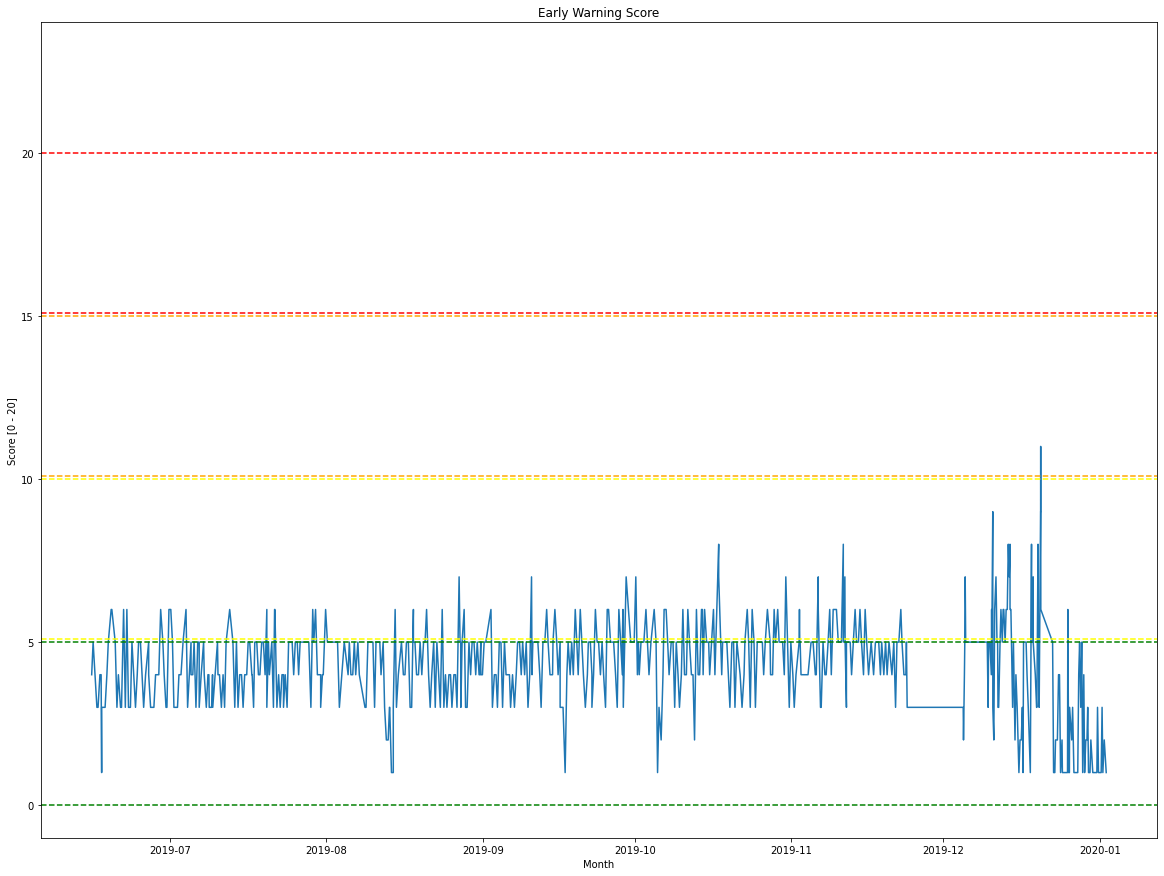

In [12]:
plt.figure(figsize = (20,15))

plt.plot (patient.ObservationDate, patient.EWS_Total)

plt.title('Early Warning Score')
plt.xlabel('Month')
plt.ylabel('Score [0 - 20]')

plt.axhline(y=0, color='g', linestyle='--')
plt.axhline(y=5, color='g', linestyle='--')
plt.axhline(y=5.1, color='yellow', linestyle='--')
plt.axhline(y=10, color='yellow', linestyle='--') 
plt.axhline(y=10.1, color='orange', linestyle='--')
plt.axhline(y=15, color='orange', linestyle='--')
plt.axhline(y=15.1, color='red', linestyle='--')
plt.axhline(y=20, color='red', linestyle='--')

plt.ylim(top=24)

plt.show()

#### Blood Pressure

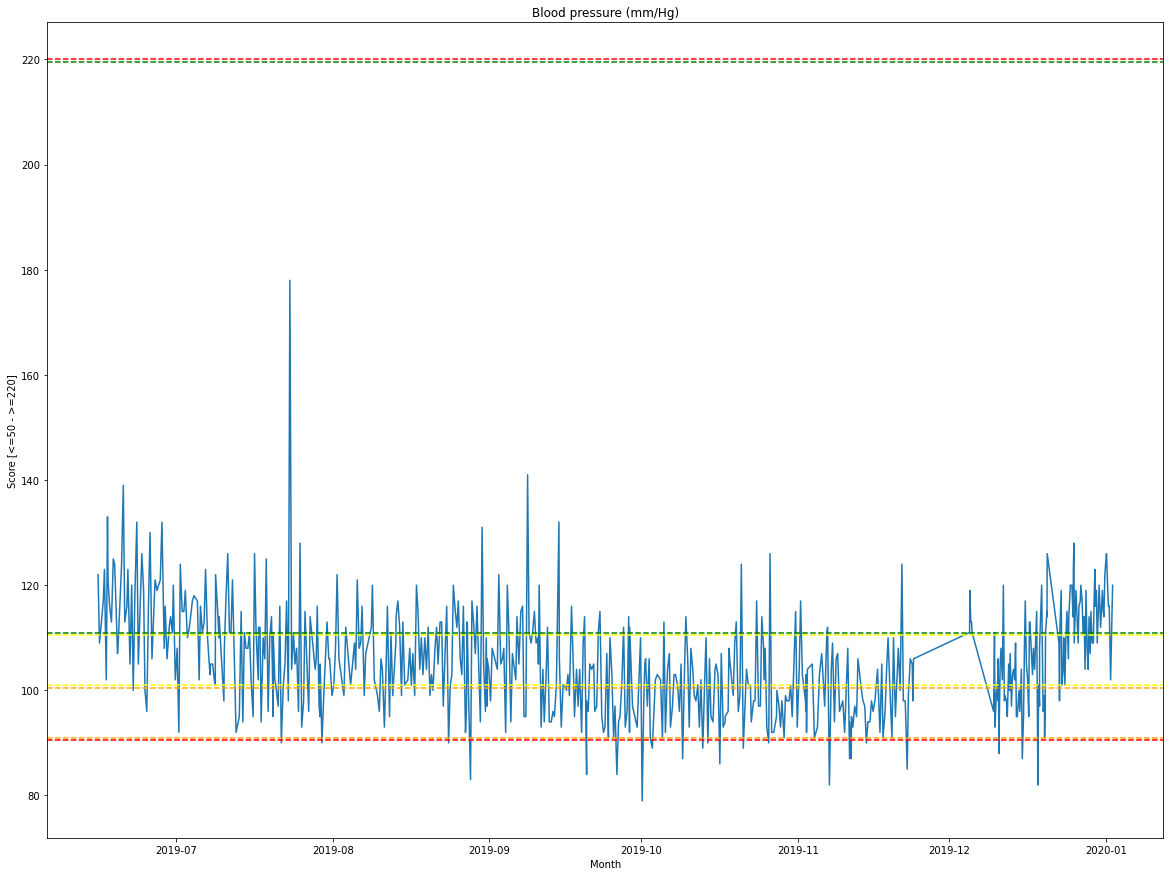

In [13]:
plt.figure(figsize = (20,15))

plt.plot (patient.ObservationDate, patient.SBP)

plt.title('Blood pressure (mm/Hg)')
plt.xlabel('Month')
plt.ylabel('Score [<=50 - >=220]')

plt.axhline(y=220, color='red', linestyle='--') 
plt.axhline(y=219.5, color='g', linestyle='--')
plt.axhline(y=111, color='g', linestyle='--')
plt.axhline(y=110.5, color='yellow', linestyle='--')
plt.axhline(y=101, color='yellow', linestyle='--') 
plt.axhline(y=100.5, color='orange', linestyle='--')
plt.axhline(y=91, color='orange', linestyle='--')
plt.axhline(y=90.5, color='red', linestyle='--')

plt.show()

#### Oxygen Saturation level

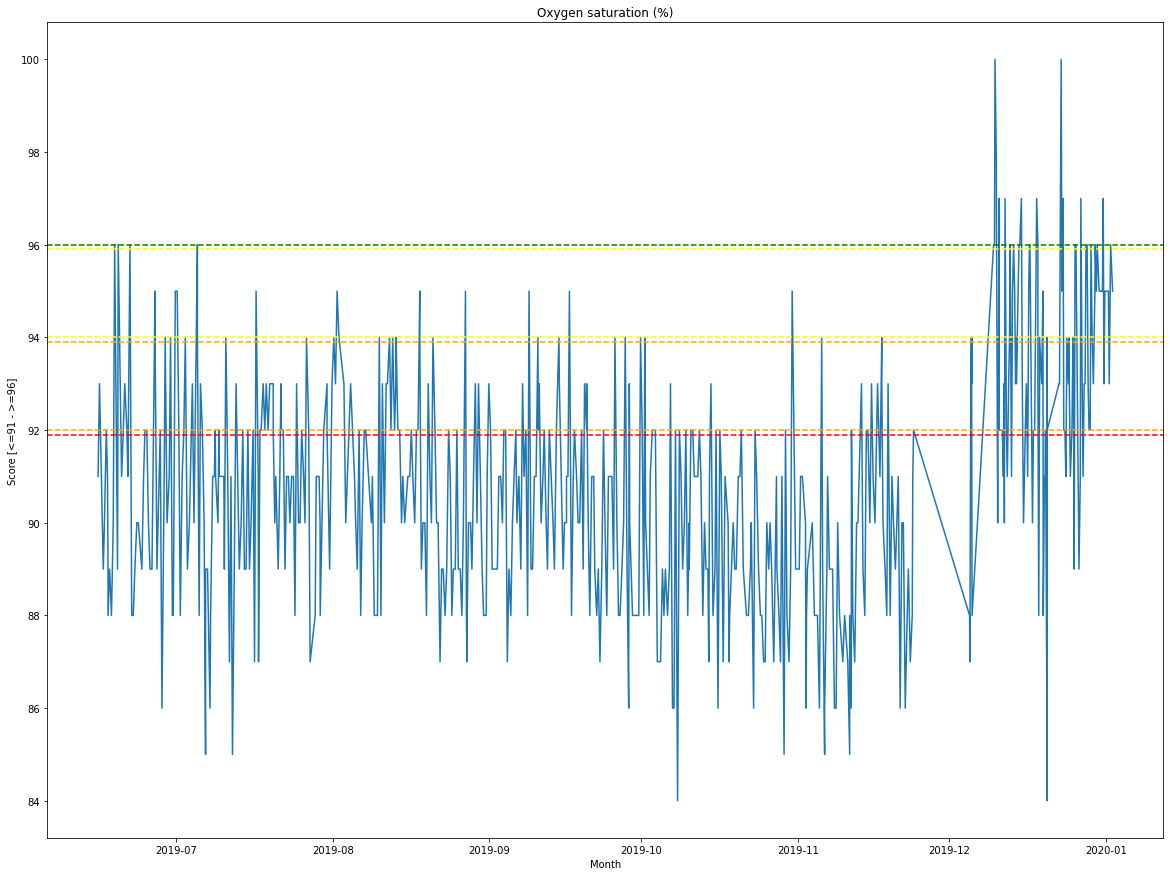

In [159]:
plt.figure(figsize = (20,15))

plt.plot (patient.ObservationDate, patient.SpO2)

plt.title('Oxygen saturation (%)')
plt.xlabel('Month')
plt.ylabel('Score [<=91 - >=96]')

plt.axhline(y=96, color='g', linestyle='--')
plt.axhline(y=95.9, color='yellow', linestyle='--') 
plt.axhline(y=94, color='yellow', linestyle='--')
plt.axhline(y=93.9, color='orange', linestyle='--')
plt.axhline(y=92, color='orange', linestyle='--')
plt.axhline(y=91.9, color='red', linestyle='--')

plt.show()

#### Pulse/Haert rate

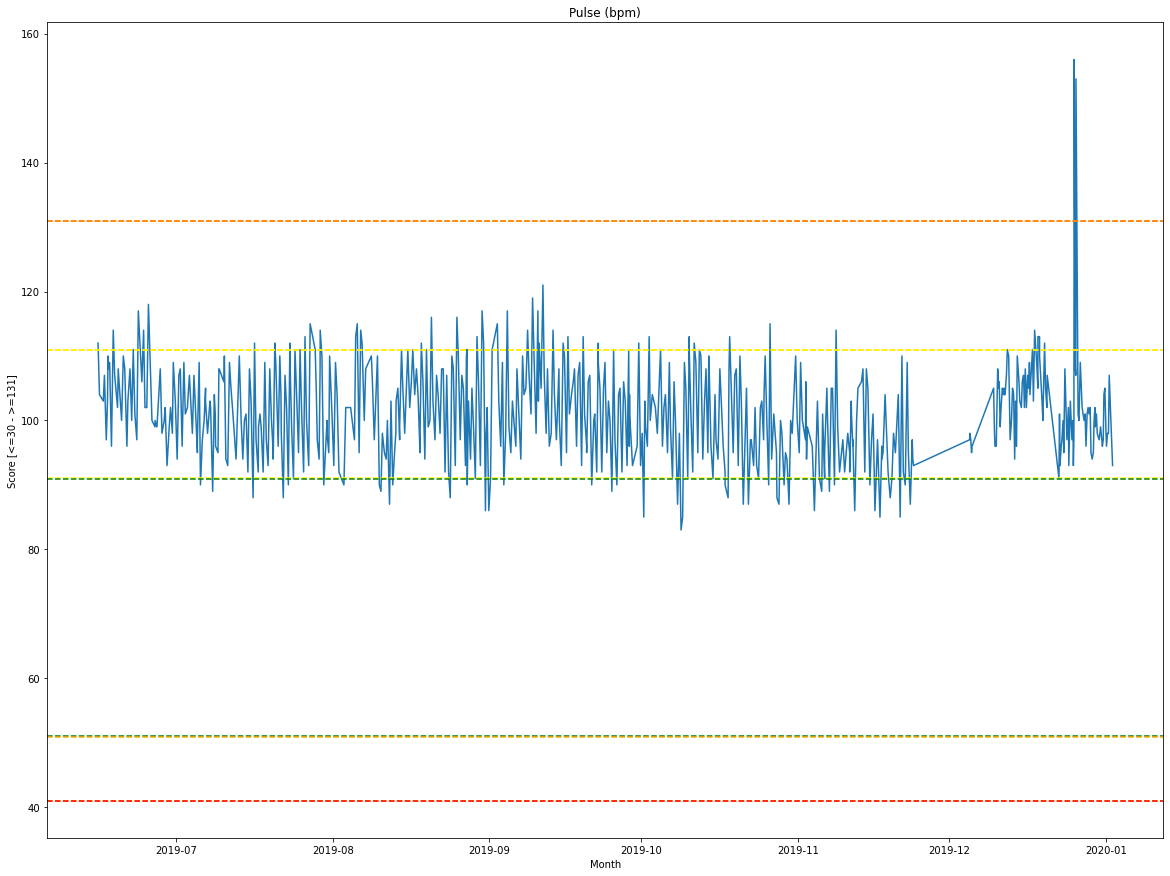

In [160]:
plt.figure(figsize = (20,15))

plt.plot (patient.ObservationDate, patient.HR)

plt.title('Pulse (bpm)')
plt.xlabel('Month')
plt.ylabel('Score [<=30 - >=131]')

plt.axhline(y=131, color='red', linestyle='--') 
plt.axhline(y=130.9, color='orange', linestyle='--') 
plt.axhline(y=111, color='orange', linestyle='--') 
plt.axhline(y=110.9, color='yellow', linestyle='--') 
plt.axhline(y=91, color='yellow', linestyle='--') 
plt.axhline(y=90.9, color='g', linestyle='--')
plt.axhline(y=51, color='g', linestyle='--')
plt.axhline(y=50.9, color='orange', linestyle='--')
plt.axhline(y=41, color='orange', linestyle='--')
plt.axhline(y=40.9, color='red', linestyle='--')

plt.show()

#### Respiration rate

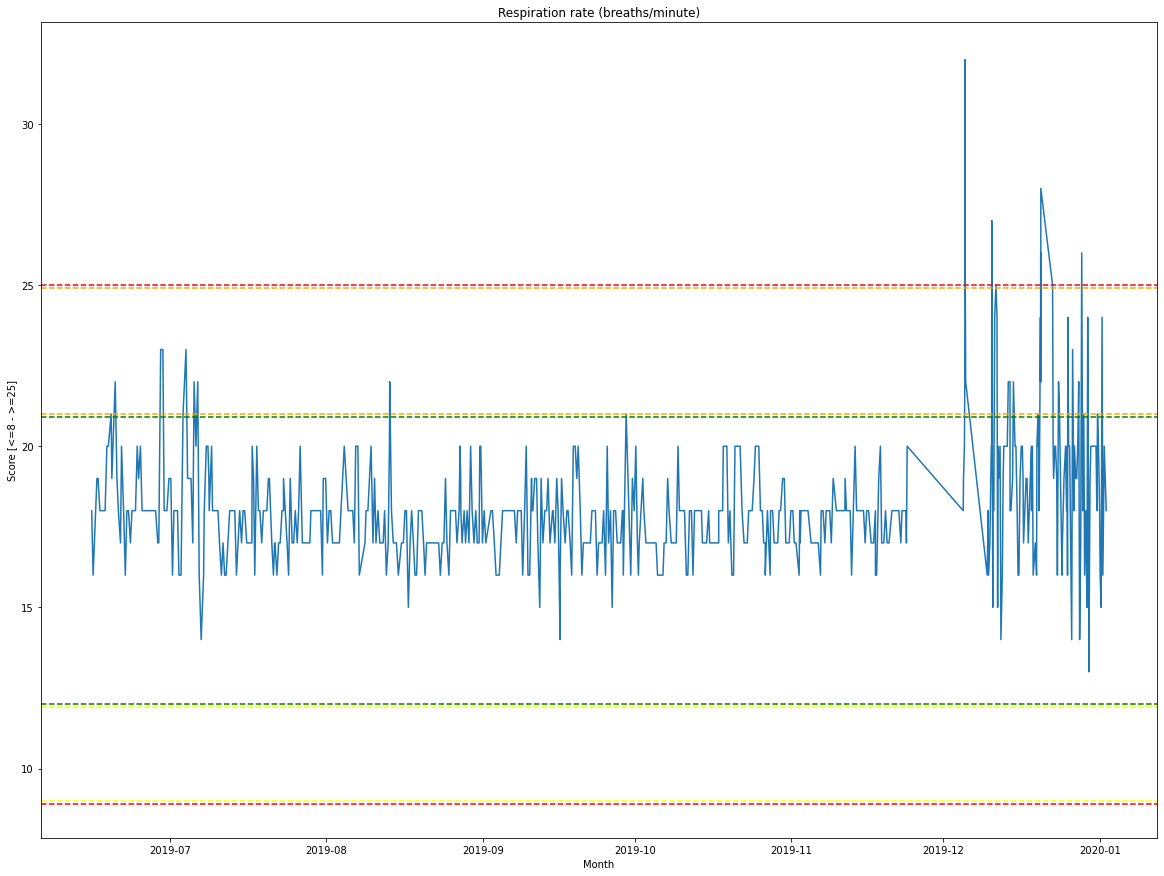

In [161]:
plt.figure(figsize = (20,15))

plt.plot (patient.ObservationDate, patient.RR)

plt.title('Respiration rate (breaths/minute)')
plt.xlabel('Month')
plt.ylabel('Score [<=8 - >=25]')

plt.axhline(y=25, color='red', linestyle='--') 
plt.axhline(y=24.9, color='orange', linestyle='--') 
plt.axhline(y=21, color='orange', linestyle='--') 
plt.axhline(y=20.9, color='g', linestyle='--')
plt.axhline(y=12, color='g', linestyle='--')
plt.axhline(y=11.9, color='yellow', linestyle='--')
plt.axhline(y=9, color='yellow', linestyle='--')
plt.axhline(y=8.9, color='red', linestyle='--')

plt.show()

#### Temperature

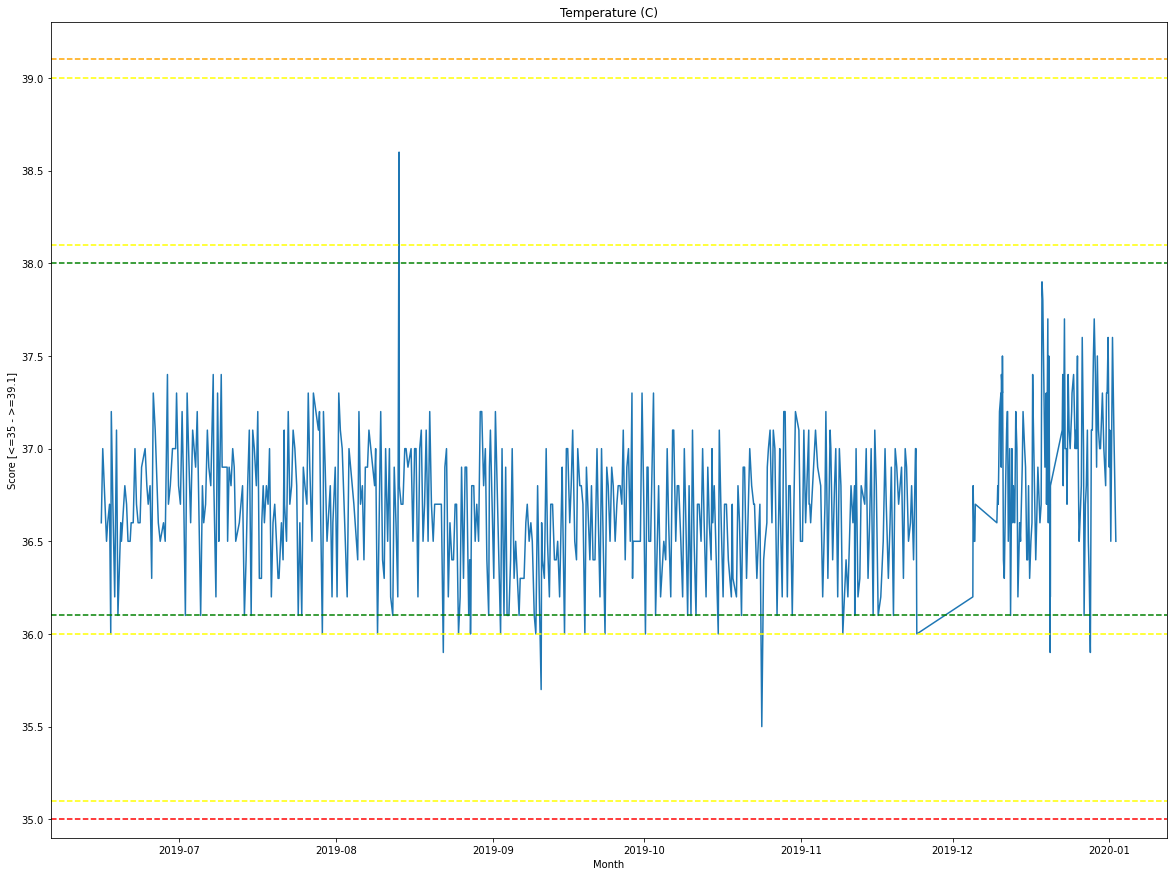

In [162]:
plt.figure(figsize = (20,15))

plt.plot (patient.ObservationDate, patient.TEMP)

plt.title('Temperature (C)')
plt.xlabel('Month')
plt.ylabel('Score [<=35 - >=39.1]')

plt.axhline(y=39.1, color='orange', linestyle='--') 
plt.axhline(y=39, color='yellow', linestyle='--') 
plt.axhline(y=38.1, color='yellow', linestyle='--') 
plt.axhline(y=38, color='g', linestyle='--')
plt.axhline(y=36.1, color='g', linestyle='--')
plt.axhline(y=36, color='yellow', linestyle='--')
plt.axhline(y=35.1, color='yellow', linestyle='--')
plt.axhline(y=35, color='red', linestyle='--')

plt.show()

### Timeseries: trend of patient ID 1743 for the last 2 months

#### Daily amount of observations

In [163]:
patient.head(50) # patient has about 2 - 3 observation a day looking at 50 observations
# try to calculate not approximation

,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
19840,2019-06-15 13:32:39,4,122.0,0,91.0,1,112,18,36.6
20025,2019-06-15 20:22:36,5,109.0,0,93.0,1,104,16,37.0
20471,2019-06-16 14:23:34,3,117.0,0,89.0,1,103,19,36.5
20617,2019-06-16 19:49:24,3,123.0,0,90.0,1,107,19,36.6
20794,2019-06-17 04:39:15,4,102.0,0,92.0,1,97,18,36.7
21002,2019-06-17 10:25:00,4,133.0,0,91.0,1,103,18,36.0
21104,2019-06-17 12:53:45,1,121.0,0,89.0,0,110,18,37.2
21108,2019-06-17 12:58:04,3,121.0,0,88.0,1,108,18,37.2
21428,2019-06-17 20:30:09,3,116.0,0,89.0,1,109,18,36.7
21622,2019-06-18 05:15:22,3,113.0,0,88.0,1,96,18,36.2


#### Blood pressure

In [164]:
bp = patient[['ObservationDate', 'SBP']]
bp['1-week'] = bp.SBP.rolling(21).mean() # 7*3 => 1 week average
bp['1-month'] = bp.SBP.rolling(90).mean () # 30* 3 => 1 month average
bp['3-month'] = bp.SBP.rolling (270).mean () # 90*3 => 3 month average

bp.dropna(inplace=True)

bp = bp[-200:]

bp.head(5)

,ObservationDate,SBP,1-week,1-month,3-month
121345,2019-10-30 21:31:00,95.0,99.142857,100.055556,103.177778
121886,2019-10-31 13:53:22,115.0,99.190476,100.166667,103.229630
122223,2019-10-31 21:22:36,93.0,98.476190,100.022222,103.170370
122517,2019-11-01 06:56:02,104.0,98.571429,100.100000,103.170370
122756,2019-11-01 13:28:52,117.0,99.000000,100.222222,103.155556


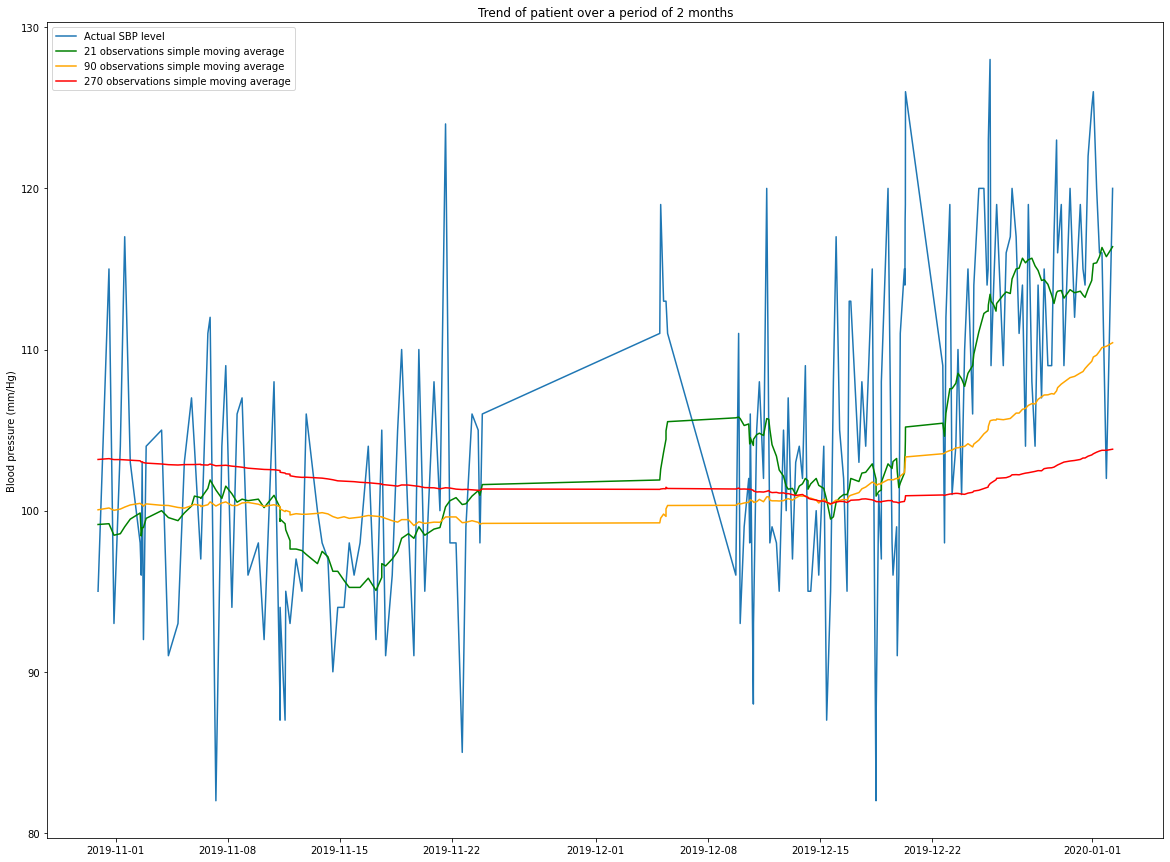

In [165]:
plt.figure(figsize = (20,15))

plt.plot(bp.ObservationDate, bp.SBP, label = 'Actual SBP level')
plt.plot(bp.ObservationDate, bp['1-week'], label = '21 observations simple moving average', c ='green')
plt.plot(bp.ObservationDate, bp['1-month'] , label = '90 observations simple moving average', c='orange')
plt.plot(bp.ObservationDate, bp['3-month'] , label = '270 observations simple moving average', c='red')

plt.ylabel ('Blood pressure (mm/Hg)')
plt.title ('Trend of patient over a period of 2 months')

plt.legend ()

plt.show ()

#### Oxygen Saturation level

In [166]:
os = patient[['ObservationDate', 'SpO2']]
os['1-week'] = os.SpO2.rolling(21).mean() # 7*3 => 1 week average
os['1-month'] = os.SpO2.rolling(90).mean () # 30* 3 => 1 month average
os['3-month'] = os.SpO2.rolling (270).mean () # 90*3 => 3 month average

os.dropna(inplace=True)

os = os[-200:]

os.head(5)

,ObservationDate,SpO2,1-week,1-month,3-month
121345,2019-10-30 21:31:00,95.0,88.809524,89.455556,90.192593
121886,2019-10-31 13:53:22,89.0,88.857143,89.400000,90.177778
122223,2019-10-31 21:22:36,89.0,88.952381,89.388889,90.170370
122517,2019-11-01 06:56:02,89.0,89.047619,89.388889,90.166667
122756,2019-11-01 13:28:52,91.0,89.238095,89.422222,90.174074


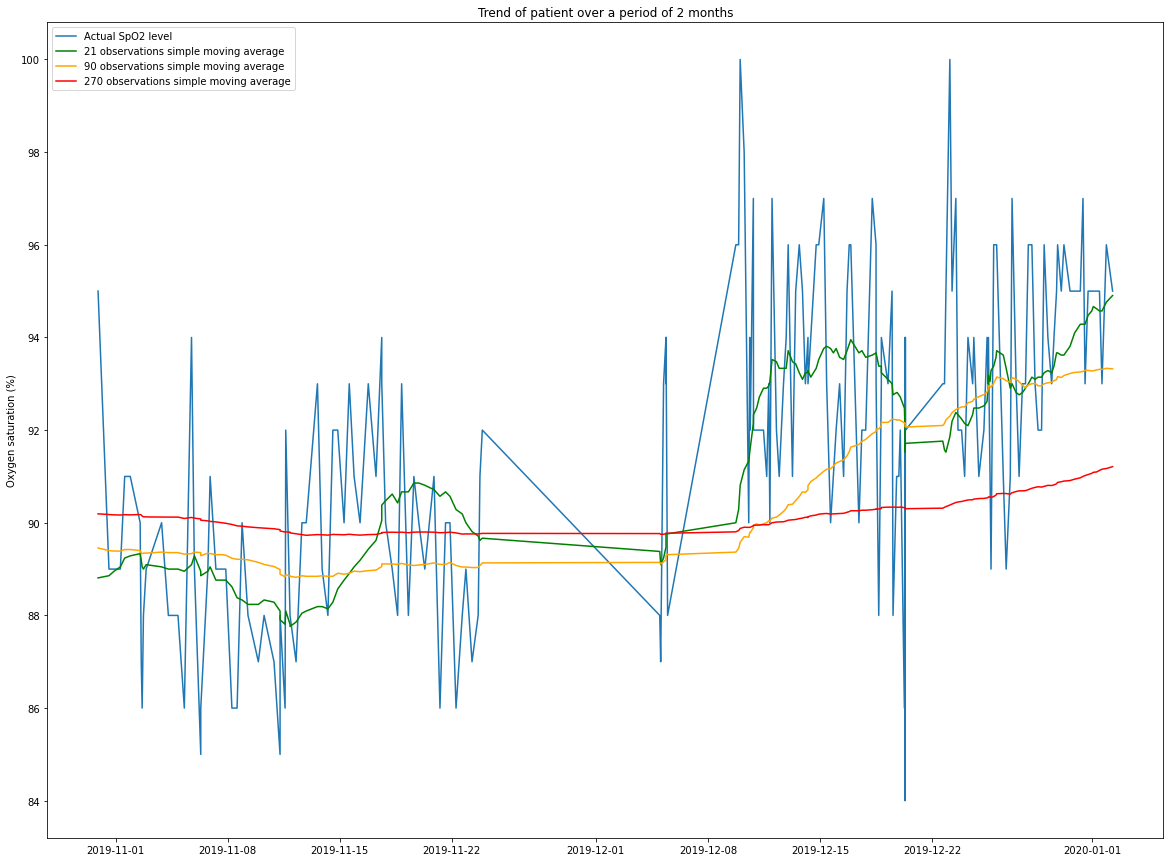

In [167]:
plt.figure(figsize = (20,15))

plt.plot(os.ObservationDate, os.SpO2, label = 'Actual SpO2 level')
plt.plot(os.ObservationDate, os['1-week'], label = '21 observations simple moving average', c ='green')
plt.plot(os.ObservationDate, os['1-month'] , label = '90 observations simple moving average', c='orange')
plt.plot(os.ObservationDate, os['3-month'] , label = '270 observations simple moving average', c='red')

plt.ylabel ('Oxygen saturation (%)')
plt.title ('Trend of patient over a period of 2 months')

plt.legend ()

plt.show ()

#### Pulse/Haert rate

In [168]:
hr = patient[['ObservationDate', 'HR']]
hr['1-week'] = hr.HR.rolling(21).mean() # 7*3 => 1 week average
hr['1-month'] = hr.HR.rolling(90).mean () # 30* 3 => 1 month average
hr['3-month'] = hr.HR.rolling (270).mean () # 90*3 => 3 month average

hr.dropna(inplace=True)

hr = hr[-200:]

hr.head(5)

,ObservationDate,HR,1-week,1-month,3-month
121345,2019-10-30 21:31:00,98,97.190476,99.411111,101.344444
121886,2019-10-31 13:53:22,110,97.523810,99.488889,101.374074
122223,2019-10-31 21:22:36,100,97.666667,99.500000,101.385185
122517,2019-11-01 06:56:02,95,97.238095,99.488889,101.318519
122756,2019-11-01 13:28:52,109,97.190476,99.444444,101.296296


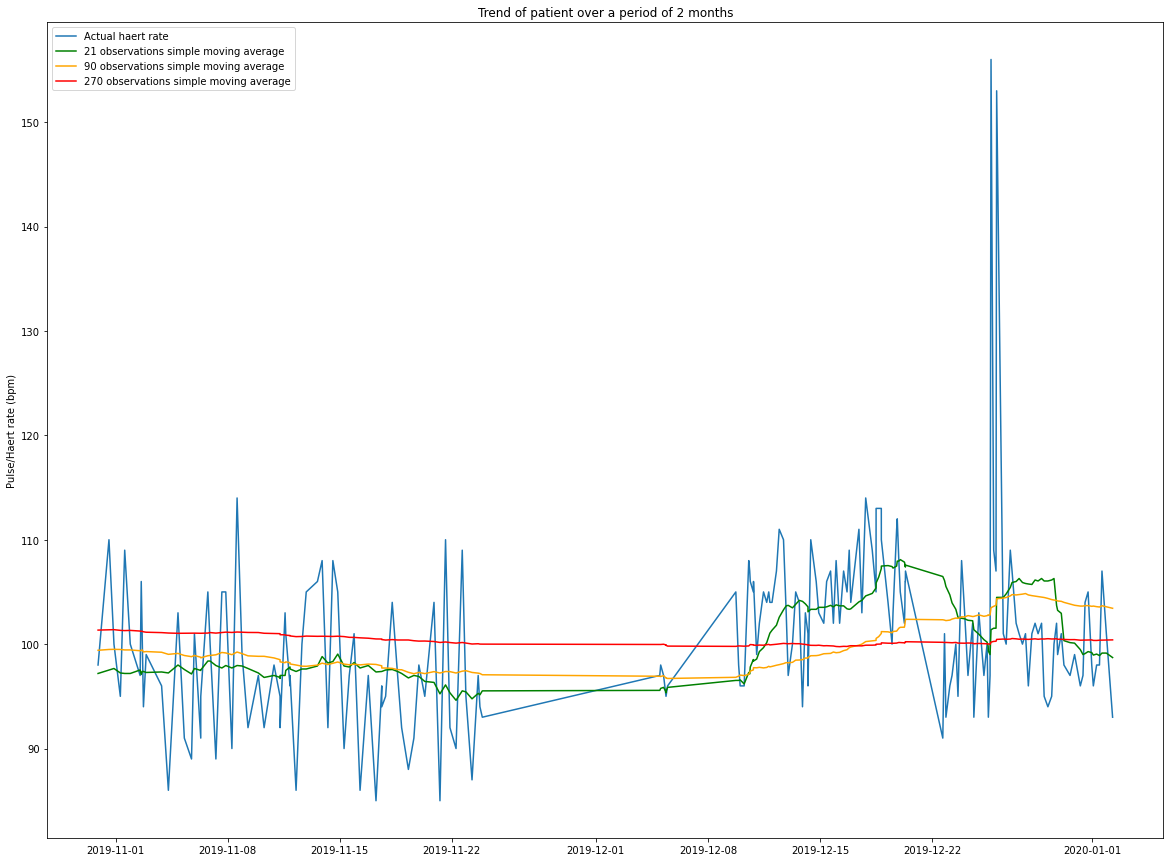

In [169]:
plt.figure(figsize = (20,15))

plt.plot(hr.ObservationDate, hr.HR, label = 'Actual haert rate')
plt.plot(hr.ObservationDate, hr['1-week'], label = '21 observations simple moving average', c ='green')
plt.plot(hr.ObservationDate, hr['1-month'] , label = '90 observations simple moving average', c='orange')
plt.plot(hr.ObservationDate, hr['3-month'] , label = '270 observations simple moving average', c='red')

plt.ylabel ('Pulse/Haert rate (bpm)')
plt.title ('Trend of patient over a period of 2 months')

plt.legend ()

plt.show ()

#### Respiration rate

In [170]:
rr = patient[['ObservationDate', 'RR']]
rr['1-week'] = rr.RR.rolling(21).mean() # 7*3 => 1 week average
rr['1-month'] = rr.RR.rolling(90).mean () # 30* 3 => 1 month average
rr['3-month'] = rr.RR.rolling (270).mean () # 90*3 => 3 month average

rr.dropna(inplace=True)

rr = rr[-200:]

rr.head(5)

,ObservationDate,RR,1-week,1-month,3-month
121345,2019-10-30 21:31:00,17,18.000000,17.655556,17.640741
121886,2019-10-31 13:53:22,17,17.857143,17.666667,17.629630
122223,2019-10-31 21:22:36,18,17.761905,17.677778,17.629630
122517,2019-11-01 06:56:02,18,17.666667,17.677778,17.629630
122756,2019-11-01 13:28:52,17,17.523810,17.655556,17.625926


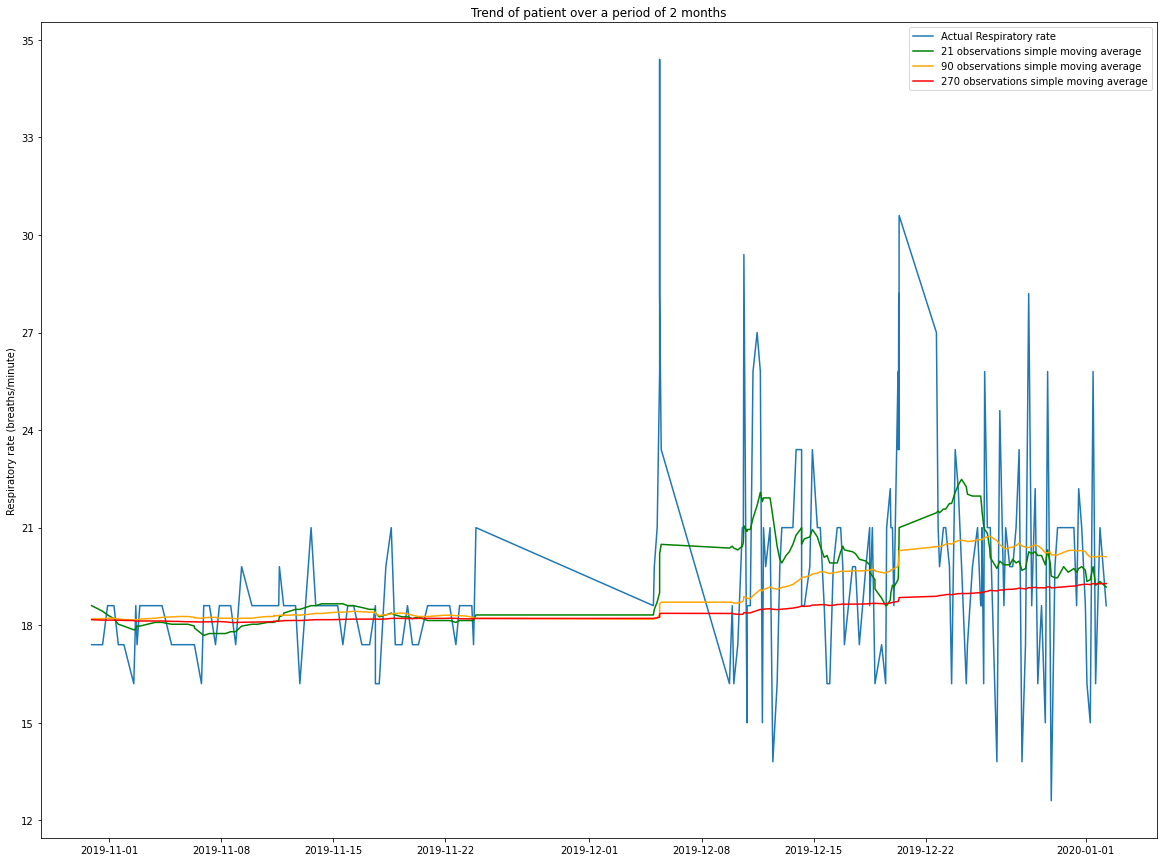

In [171]:
plt.figure(figsize = (20,15))

plt.plot(rr.ObservationDate, rr.RR, label = 'Actual Respiratory rate')
plt.plot(rr.ObservationDate, rr['1-week'], label = '21 observations simple moving average', c ='green')
plt.plot(rr.ObservationDate, rr['1-month'] , label = '90 observations simple moving average', c='orange')
plt.plot(rr.ObservationDate, rr['3-month'] , label = '270 observations simple moving average', c='red')

plt.yticks ([12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5],
           [12, 15, 18, 21, 24, 27, 30, 33, 35])
plt.ylabel ('Respiratory rate (breaths/minute)')
plt.title ('Trend of patient over a period of 2 months')

plt.legend ()

plt.show ()

#### Temperature

In [172]:
temp = patient[['ObservationDate', 'TEMP']]
temp['1-week'] = temp.TEMP.rolling(21).mean() # 7*3 => 1 week average
temp['1-month'] = temp.TEMP.rolling(90).mean () # 30* 3 => 1 month average
temp['3-month'] = temp.TEMP.rolling (270).mean () # 90*3 => 3 month average

temp.dropna(inplace=True)

temp = temp[-200:]

temp.head(5)

,ObservationDate,TEMP,1-week,1-month,3-month
121345,2019-10-30 21:31:00,37.2,36.761905,36.627778,36.635556
121886,2019-10-31 13:53:22,37.1,36.790476,36.630000,36.637037
122223,2019-10-31 21:22:36,36.5,36.785714,36.630000,36.637407
122517,2019-11-01 06:56:02,36.5,36.766667,36.630000,36.634815
122756,2019-11-01 13:28:52,37.1,36.771429,36.631111,36.636296


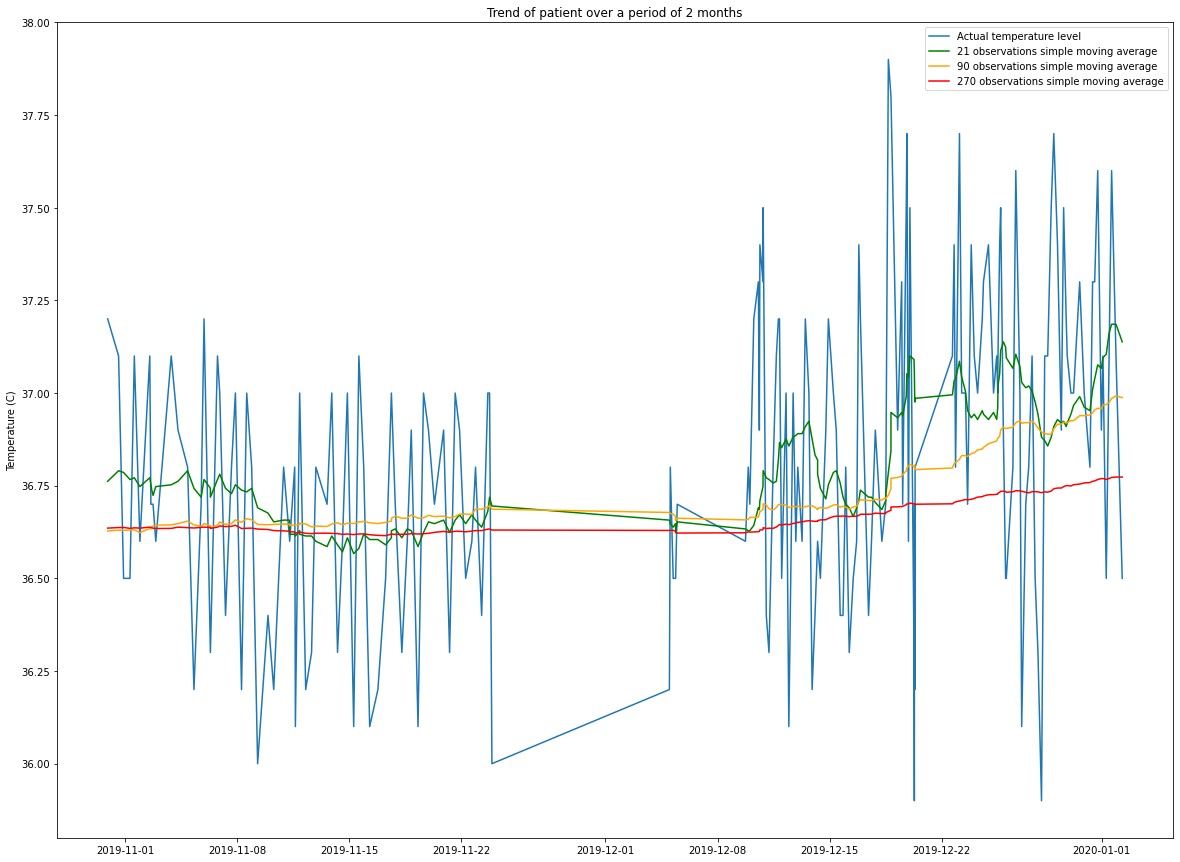

In [173]:
plt.figure(figsize = (20,15))

plt.plot(temp.ObservationDate, temp.TEMP, label = 'Actual temperature level')
plt.plot(temp.ObservationDate, temp['1-week'], label = '21 observations simple moving average', c ='green')
plt.plot(temp.ObservationDate, temp['1-month'] , label = '90 observations simple moving average', c='orange')
plt.plot(temp.ObservationDate, temp['3-month'] , label = '270 observations simple moving average', c='red')

plt.ylabel ('Temperature (C)')
plt.title ('Trend of patient over a period of 2 months')

plt.legend ()

plt.show ()

### Timeseries forecasting

#### Narrow down dataframe (1 month of observations)

In [174]:
forecast = patient[['ObservationDate', 'TEMP']]
forecast = forecast[-127:] #first observation in december (a bit more then one month of data)
forecast

,ObservationDate,TEMP
151289,2019-12-04 23:50:02,36.2
151324,2019-12-05 01:11:50,36.8
151391,2019-12-05 05:31:33,36.5
151555,2019-12-05 09:10:41,36.5
151556,2019-12-05 09:11:00,36.5
...,...,...
171085,2020-01-01 06:54:48,36.5
171182,2020-01-01 11:10:28,37.1
171290,2020-01-01 14:56:00,37.6
171496,2020-01-01 21:30:12,37.1


#### Feature engineering

In [175]:
forecast['Date'] = [d.date() for d in forecast['ObservationDate']] # split up datetime object
forecast['Time'] = [d.time() for d in forecast['ObservationDate']]
forecast = forecast[['Date', 'Time', 'TEMP', 'ObservationDate']]
del forecast['ObservationDate']
forecast.head(5)

,Date,Time,TEMP
151289,2019-12-04,23:50:02,36.2
151324,2019-12-05,01:11:50,36.8
151391,2019-12-05,05:31:33,36.5
151555,2019-12-05,09:10:41,36.5
151556,2019-12-05,09:11:00,36.5


In [176]:
temps = DataFrame(forecast.TEMP.values) # lag features lag = 1
lag1 = concat([temps.shift(1), temps], axis=1) 
lag1.columns = ['t', 't+1'] 
lag1.head(5)

,t,t+1
0,NaN,36.2
1,36.2,36.8
2,36.8,36.5
3,36.5,36.5
4,36.5,36.5


In [177]:
temps = DataFrame(forecast.TEMP.values) # new lag dataframe
lagm = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1) 
lagm.columns = ['t-2', 't-1', 't', 't+1']
lagm.head(5)

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,36.2
1,NaN,NaN,36.2,36.8
2,NaN,36.2,36.8,36.5
3,36.2,36.8,36.5,36.5
4,36.8,36.5,36.5,36.5


In [178]:
temps = DataFrame(forecast.TEMP.values) # rolling windows statistics
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
rollingm = concat([means, temps], axis=1) 
rollingm.columns = ['mean(t-1,t)', 't+1'] 
rollingm.head(5)

,"mean(t-1,t)",t+1
0,NaN,36.2
1,NaN,36.8
2,36.50,36.5
3,36.65,36.5
4,36.50,36.5


In [179]:
temps = DataFrame(forecast.TEMP.values) # some more descriptive statistics
window = temps.expanding()
rollingstats = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1) 
rollingstats.columns = ['min', 'mean', 'max', 't+1']
rollingstats.head(5)

,min,mean,max,t+1
0,36.2,36.2,36.2,36.8
1,36.2,36.5,36.8,36.5
2,36.2,36.5,36.8,36.5
3,36.2,36.5,36.8,36.5
4,36.2,36.5,36.8,36.5


#### Basic visuals: line plot and lag scatter plot (ook histograms , boxplots, etc kan optie zijn)

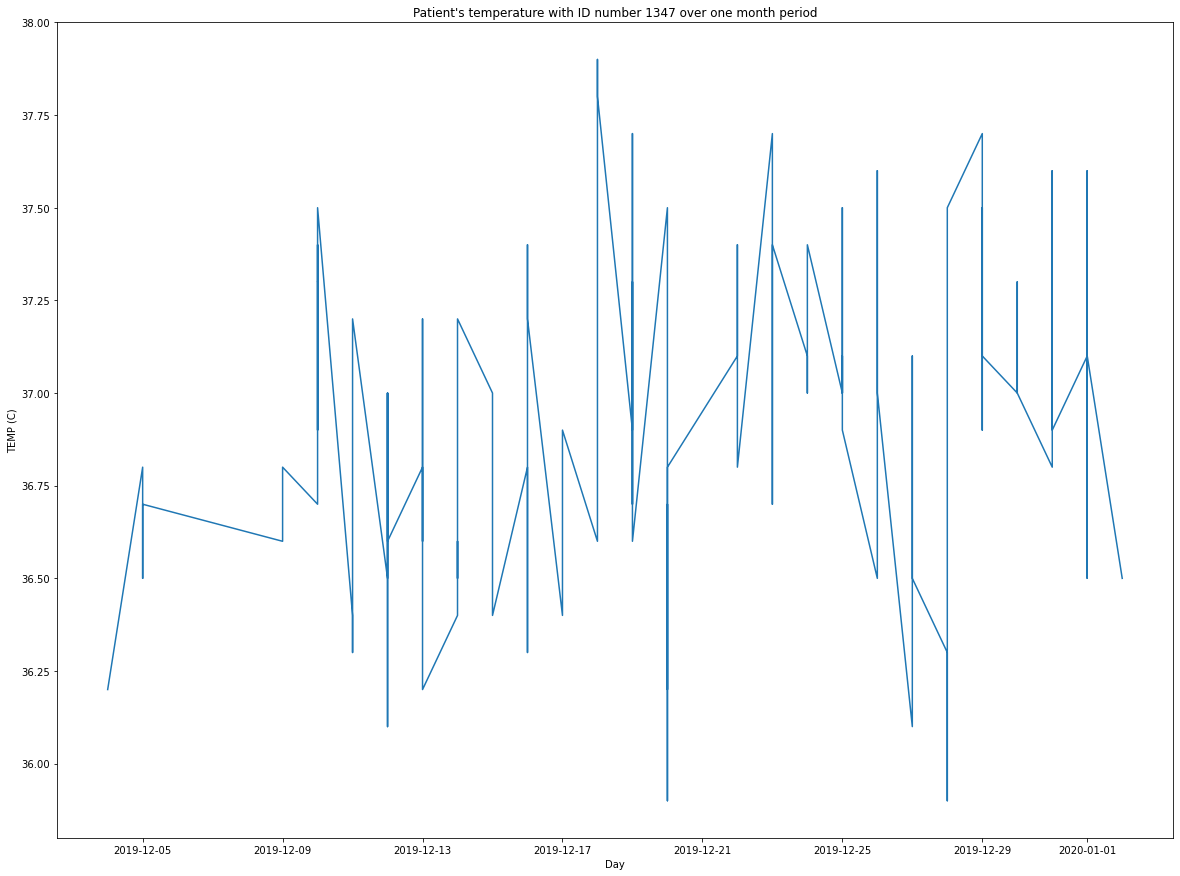

In [180]:
plt.figure(figsize = (20,15)) # lineplot

plt.plot(forecast.Date, forecast.TEMP)

plt.title("Patient's temperature with ID number 1347 over one month period")
plt.xlabel('Day')
plt.ylabel('TEMP (C)')

plt.show()

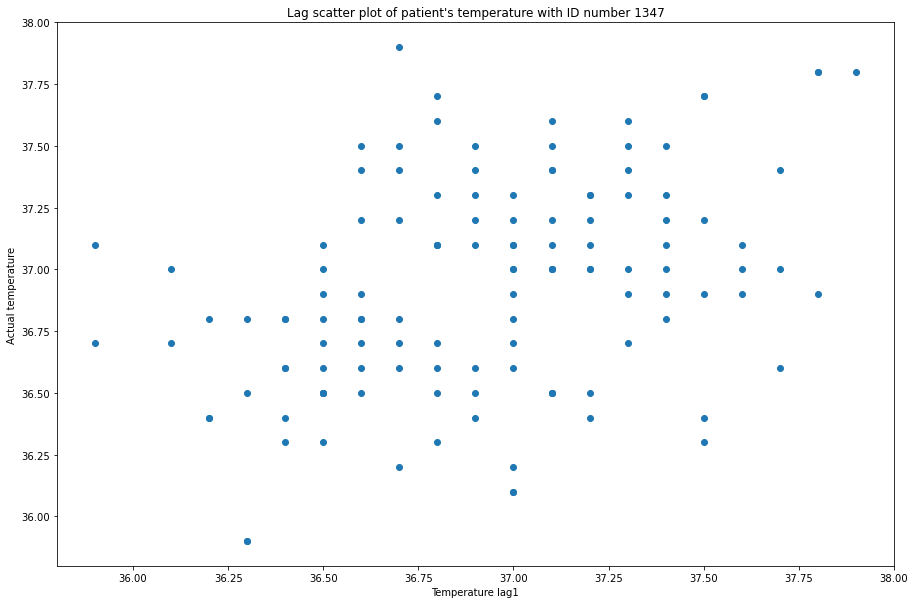

In [181]:
plt.figure(figsize = (15,10)) # lag 1 scatter plot

lag_plot(forecast.TEMP)

plt.title("Lag scatter plot of patient's temperature with ID number 1347")
plt.xlabel("Temperature lag1")
plt.ylabel("Actual temperature")

plt.show()

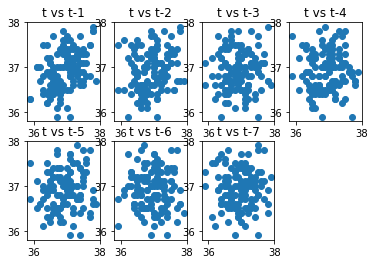

In [182]:
# create multiple lag scatter plots

values = DataFrame(forecast.TEMP.values)
lags = 7
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = concat(columns, axis=1) 
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns 
plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()

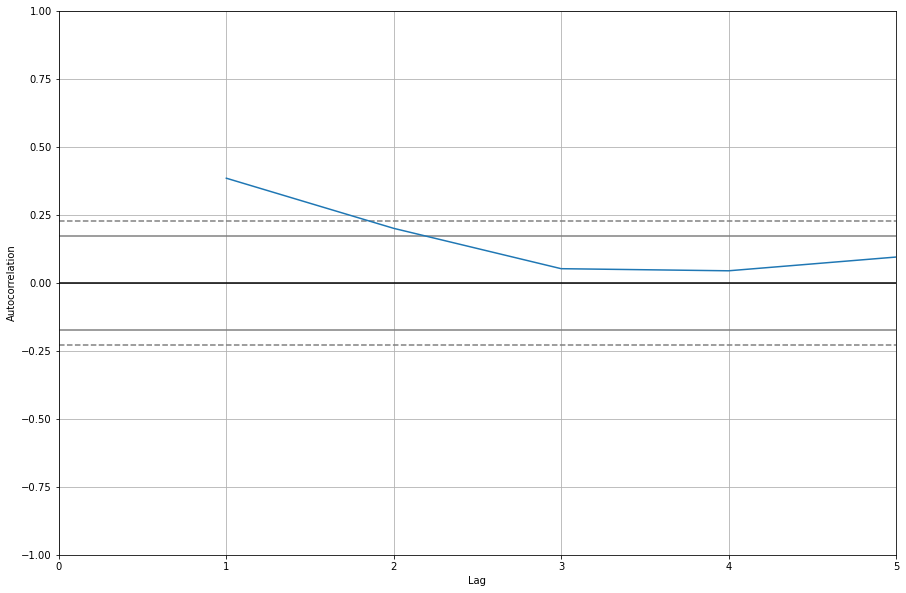

In [183]:
plt.figure(figsize=(15,10)) #autoregression

autocorrelation_plot(forecast.TEMP)
plt.xlim(0,5,1) # 0 is today which should be 1 on the y-axis

plt.show()

### Moving average smoothing as a forecast model

predicted=36.500000, expected=36.500000
predicted=36.600000, expected=36.500000
predicted=36.500000, expected=36.500000
predicted=36.500000, expected=36.700000
predicted=36.566667, expected=36.600000
predicted=36.600000, expected=36.800000
predicted=36.700000, expected=36.700000
predicted=36.700000, expected=37.200000
predicted=36.900000, expected=37.300000
predicted=37.066667, expected=36.900000
predicted=37.133333, expected=37.400000
predicted=37.200000, expected=37.300000
predicted=37.200000, expected=37.500000
predicted=37.400000, expected=36.400000
predicted=37.066667, expected=36.300000
predicted=36.733333, expected=36.800000
predicted=36.500000, expected=37.100000
predicted=36.733333, expected=37.200000
predicted=37.033333, expected=37.200000
predicted=37.166667, expected=36.500000
predicted=36.966667, expected=37.000000
predicted=36.900000, expected=36.100000
predicted=36.533333, expected=37.000000
predicted=36.700000, expected=36.600000
predicted=36.566667, expected=36.800000


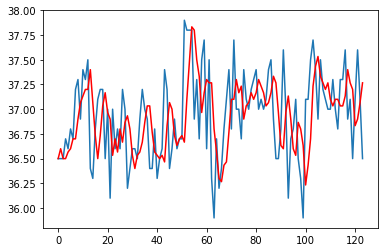

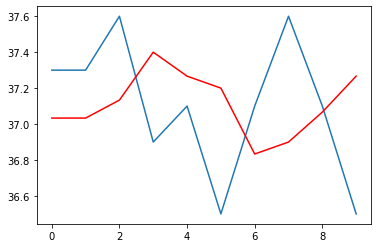

In [184]:
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error


# prepare situation
X = forecast.TEMP.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)]) 
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)

# plot all observations
plt.plot(test)
plt.plot(predictions, color='red') 
plt.show()

# zoom plot on last 10 observation actual value (blue) vs. predicted value (red)
plt.plot(test[-10:]) 
plt.plot(predictions[-10:], color='red') 
plt.show()

# the results show an RMSE of 0.461 C per observation
# window of 3 was chosen arbitrary
# naive model and assumes that the trend and seasonality components of the time series have allready
# been removed or adjusted for.

## Autocorrelation and autoregression

#### Quick check for autocorrelation

<function matplotlib.pyplot.show(*args, **kw)>

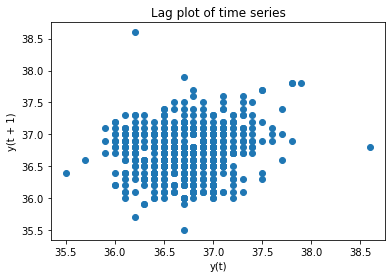

In [185]:
lag_plot(patient.TEMP)
plt.title('Lag plot of time series')
plt.show

In [186]:
values = DataFrame(patient.TEMP.values)
dataframe = concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result) #show auto correlation for lag=1

            t       t+1
t    1.000000  0.151143
t+1  0.151143  1.000000


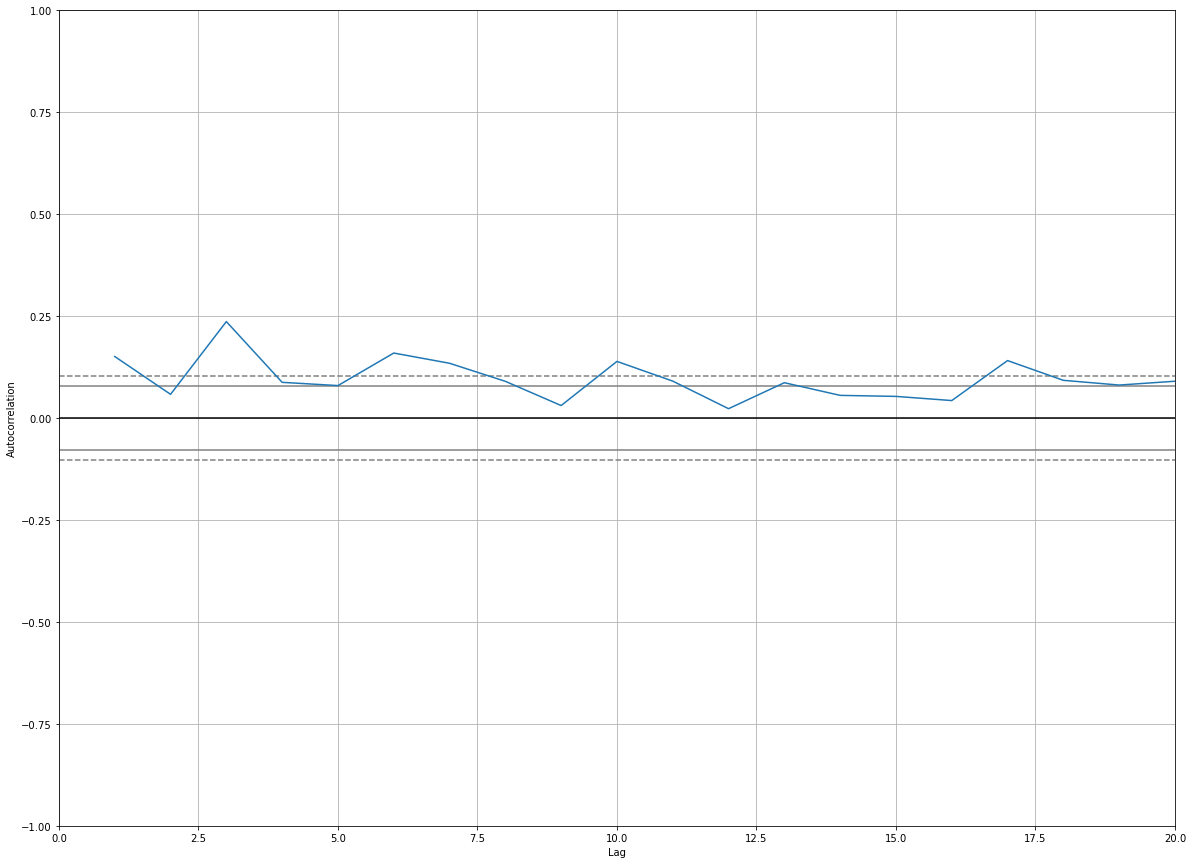

In [187]:
plt.figure(figsize=(20,15))

autocorrelation_plot(patient.TEMP)

plt.xlim(0,20,1)

plt.show()

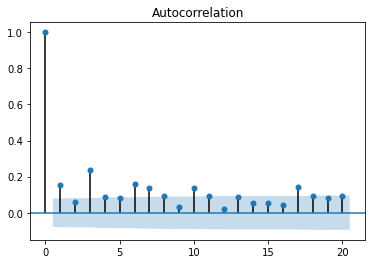

In [188]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(patient.TEMP, lags=20)
plt.show()

(616, 2)
(491,)
(491,)
(124,)
(124,)
Test RMSE: 0.478


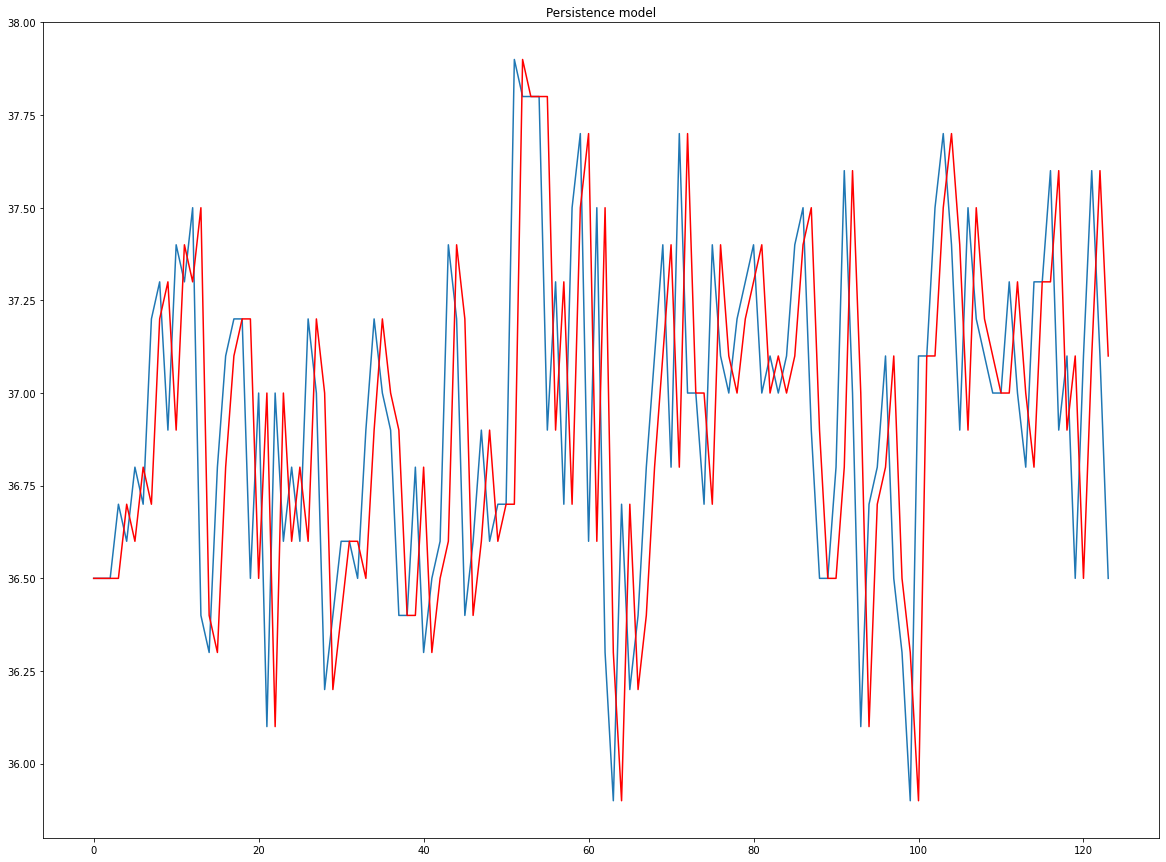

In [189]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# create lagged dataset
values = DataFrame(patient.TEMP.values)
dataframe = concat([values.shift(1), values], axis=1) 
dataframe.columns = ['t', 't+1']
print(dataframe.shape)

# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-124], X[len(X)-124:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions)) 
print('Test RMSE: %.3f' % rmse)

# plot predictions vs expected
plt.figure(figsize=(20,15))
plt.title('Persistence model')
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show() #0.479 degrees Celsius error on each observation

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


Lag: 18
Coefficients: [ 1.95321634e+01 -1.75901286e-02 -1.03770473e-01  2.13464368e-01
 -1.79359798e-02  1.38190114e-02  9.73915614e-02  5.71391357e-02
  3.46393324e-02 -8.38101218e-02  5.35863600e-02  7.69714836e-02
  3.09131396e-02  1.10810919e-01 -3.95969495e-03  3.40056148e-02
 -7.25549263e-02  5.01641586e-02 -5.88166348e-03]
predicted=36.585753, expected=36.500000
predicted=36.792138, expected=36.500000
predicted=36.612325, expected=36.500000
predicted=36.569771, expected=36.700000
predicted=36.597521, expected=36.600000
predicted=36.744233, expected=36.800000
predicted=36.674132, expected=36.700000
predicted=36.610549, expected=37.200000
predicted=36.665081, expected=37.300000
predicted=36.623400, expected=36.900000
predicted=36.546330, expected=37.400000
predicted=36.665820, expected=37.300000
predicted=36.716154, expected=37.500000
predicted=36.637155, expected=36.400000
predicted=36.623951, expected=36.300000
predicted=36.684191, expected=36.800000
predicted=36.652325, expecte

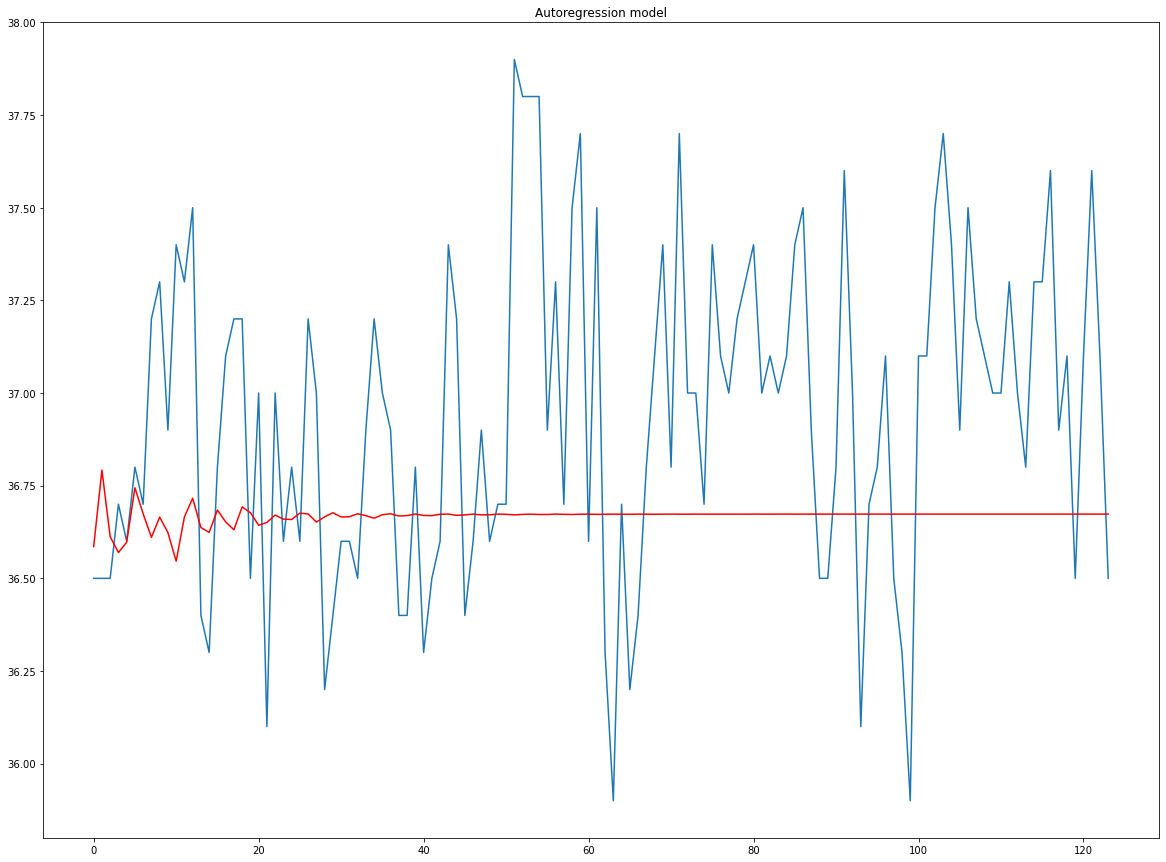

In [190]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# split dataset
X = patient.TEMP.values
train, test = X[1:len(X)-124], X[len(X)-124:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot results
plt.figure(figsize=(20,15))
plt.title('Autoregression model')
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted=36.585753, expected=36.500000
predicted=36.793646, expected=36.500000
predicted=36.626363, expected=36.500000
predicted=36.583757, expected=36.700000
predicted=36.546063, expected=36.600000
predicted=36.710753, expected=36.800000
predicted=36.690319, expected=36.700000
predicted=36.567597, expected=37.200000
predicted=36.635085, expected=37.300000
predicted=36.558952, expected=36.900000
predicted=36.625393, expected=37.400000
predicted=36.744661, expected=37.300000
predicted=36.635936, expected=37.500000
predicted=36.784007, expected=36.400000
predicted=36.737059, expected=36.300000
predicted=36.956711, expected=36.800000
predicted=36.716440, expected=37.100000
predicted=36.672188, expected=37.200000
predicted=36.867344, expected=37.200000
predicted=36.741519, expected=36.500000
predicted=36.798410, expected=37.000000
predicted=36.858482, expected=36.100000
predicted=36.829535, expected=37.000000
predicted=37.050244, expected=36.600000
predicted=36.635235, expected=36.800000


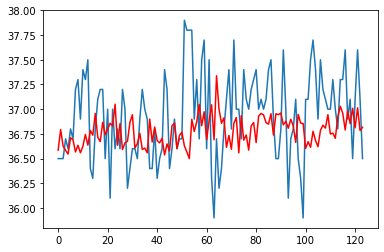

In [191]:
# create and evaluate an updated autoregressive model (only needed with continuous input of data)

# split dataset
X = patient.TEMP.values
train, test = X[1:len(X)-124], X[len(X)-124:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)

# plot
plt.plot(test)
plt.plot(predictions, color='red') 
plt.show()
# correct predictions with forecast error on the temperature patient

## Moving average models for forecasting

In [192]:
dataframe = concat([patient.TEMP.shift(1), patient.TEMP], axis=1)  #feature engineering
dataframe.columns = ['t', 't+1']
dataframe

,t,t+1
19840,NaN,36.6
20025,36.6,37.0
20471,37.0,36.5
20617,36.5,36.6
20794,36.6,36.7
...,...,...
171085,37.1,36.5
171182,36.5,37.1
171290,37.1,37.6
171496,37.6,37.1


In [193]:
X = dataframe.values #split into train/test
train_size = int(len(X) * 0.80)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(491,)
(491,)
(124,)
(124,)


In [194]:
  # persistence model
predictions = [x for x in test_X]

In [195]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt

# create lagged dataset
values = DataFrame(patient.TEMP.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.80)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
predictions = [x for x in test_X]

# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))] 
residuals = DataFrame(residuals)
print(residuals.head(5)) #first five rows of the forecast residual errors + the RMSE of the persistence
#forecasts

Test RMSE: 0.478
     0
0  0.0
1  0.0
2  0.0
3  0.2
4 -0.1


In [196]:
### bouwt verder op split into train and test sets vorige oefening
### Autoregression model of persistence residual error

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))] 

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=18, Coef=[ 2.35025925e-05 -9.90205407e-01 -1.06976023e+00 -8.20196284e-01
 -8.16166878e-01 -7.76467069e-01 -6.62485174e-01 -5.82143448e-01
 -5.28032411e-01 -5.88853106e-01 -5.01079618e-01 -4.01502142e-01
 -3.49879478e-01 -2.19926358e-01 -1.98600483e-01 -1.38940230e-01
 -2.00164297e-01 -1.12922312e-01 -8.97291084e-02]


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted error=0.297085, expected error=0.000000
predicted error=-0.344771, expected error=0.000000
predicted error=-0.508810, expected error=0.000000
predicted error=0.307357, expected error=0.000000
predicted error=0.307357, expected error=0.000000
predicted error=-0.090134, expected error=0.000000
predicted error=0.142723, expected error=0.000000
predicted error=0.037116, expected error=0.000000
predicted error=-0.021769, expected error=0.000000
predicted error=0.178663, expected error=0.000000
predicted error=0.218813, expected error=0.000000
predicted error=-0.026102, expected error=0.000000
predicted error=0.105853, expected error=0.000000
predicted error=0.066133, expected error=0.000000
predicted error=0.093921, expected error=0.000000
predicted error=0.113938, expected error=0.000000
predicted error=0.012308, expected error=0.000000
predicted error=0.084091, expected error=0.000000
predicted error=0.000024, expected error=0.000000
predicted error=0.000024, expected error=0.00

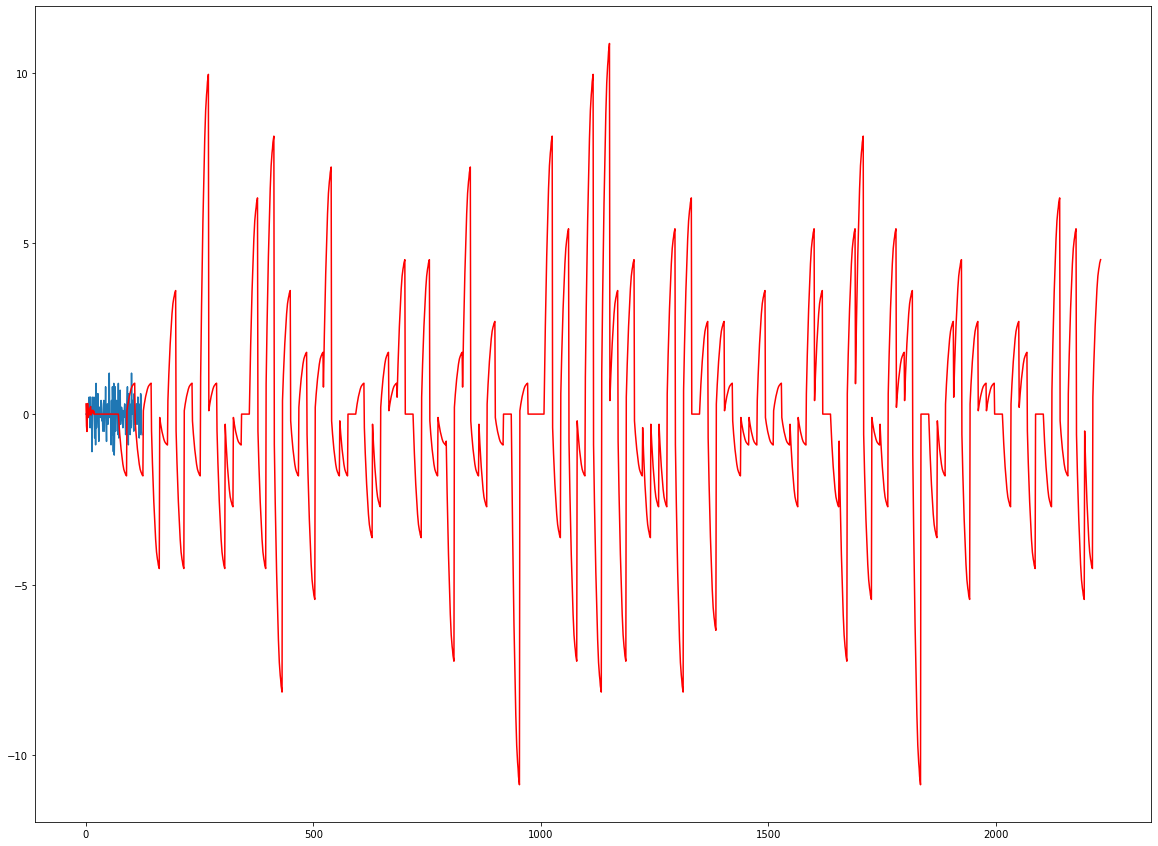

In [197]:
# walk forward over time steps in test
# predict the residual error using the autoregression model
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
        predictions.append(pred_error)
        history.append(error)
        print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
plt.figure(figsize=(20,15))
plt.plot(expected_error) 
plt.plot(predictions, color='red') 
plt.show()
# Forecast residual errors                                                                                        

In [198]:
  # correct the prediction
yhat = yhat + pred_error

predicted=36.584091, expected=36.500000
predicted=36.739697, expected=36.500000
predicted=36.639742, expected=36.500000
predicted=36.586504, expected=36.700000
predicted=36.520046, expected=36.600000
predicted=36.703388, expected=36.800000
predicted=36.639028, expected=36.700000
predicted=36.564084, expected=37.200000
predicted=36.640750, expected=37.300000
predicted=36.554576, expected=36.900000
predicted=36.627437, expected=37.400000
predicted=36.780846, expected=37.300000
predicted=36.672601, expected=37.500000
predicted=36.876820, expected=36.400000
predicted=36.796068, expected=36.300000
predicted=36.951081, expected=36.800000
predicted=36.723761, expected=37.100000
predicted=36.748922, expected=37.200000
predicted=36.935165, expected=37.200000
predicted=36.828709, expected=36.500000
predicted=36.892563, expected=37.000000
predicted=36.964456, expected=36.100000
predicted=36.933583, expected=37.000000
predicted=37.141541, expected=36.600000
predicted=36.728439, expected=36.800000


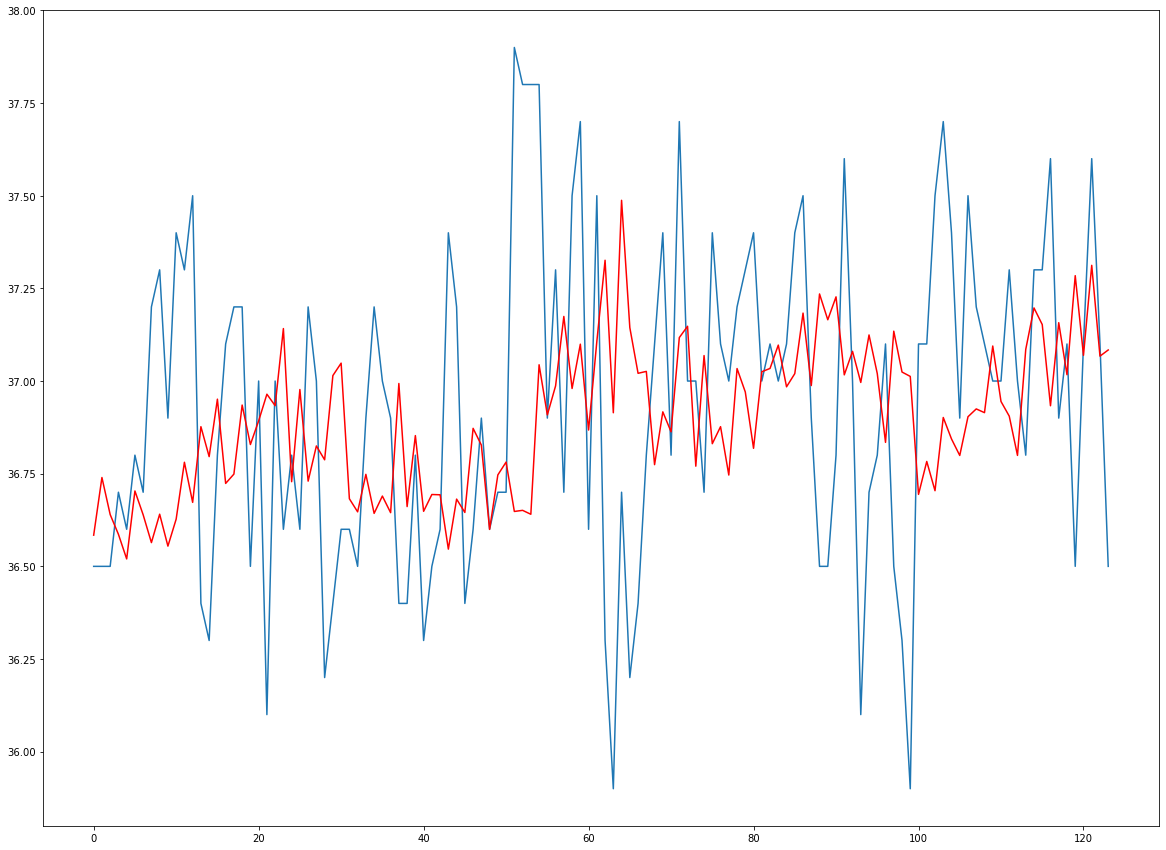

In [199]:
# correct forecasts with a model of forecast residual errors

# persistence model on training set
train_pred = [x for x in train_X]

# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]

# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
    # persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    # predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions)) 
print('Test RMSE: %.3f' % rmse)

# plot predicted error
plt.figure(figsize=(20,15))
plt.plot(test_y)
plt.plot(predictions, color='red') 
plt.show()

## ARIMA model

In [200]:
􏰀# AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
􏰀# I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
􏰀# MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

SyntaxError: invalid character in identifier (<ipython-input-200-b6554c041a8a>, line 1)

In [201]:
# p: The number of lag observations included in the model, also called the lag order.
􏰀# d: The number of times that the raw observations are differenced, also called the degree of differencing.
􏰀# q: The size of the moving average window, also called the order of moving average.

SyntaxError: invalid character in identifier (<ipython-input-201-32b5e409d83f>, line 2)

In [202]:
patient.head(5)

,ObservationDate,EWS_Total,SBP,LOC,SpO2,Add_O2,HR,RR,TEMP
19840,2019-06-15 13:32:39,4,122.0,0,91.0,1,112,18,36.6
20025,2019-06-15 20:22:36,5,109.0,0,93.0,1,104,16,37.0
20471,2019-06-16 14:23:34,3,117.0,0,89.0,1,103,19,36.5
20617,2019-06-16 19:49:24,3,123.0,0,90.0,1,107,19,36.6
20794,2019-06-17 04:39:15,4,102.0,0,92.0,1,97,18,36.7


In [203]:
new = patient[['ObservationDate', 'TEMP']]
new.head(5)

,ObservationDate,TEMP
19840,2019-06-15 13:32:39,36.6
20025,2019-06-15 20:22:36,37.0
20471,2019-06-16 14:23:34,36.5
20617,2019-06-16 19:49:24,36.6
20794,2019-06-17 04:39:15,36.7


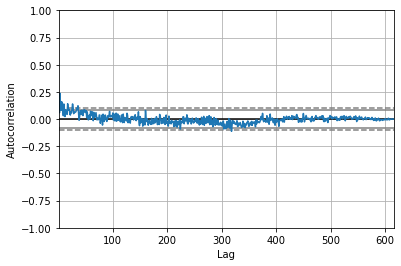

In [205]:
# autocorrelation plot
autocorrelation_plot(new.TEMP)
pyplot.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                             ARIMA Model Results                              
Dep. Variable:                 D.TEMP   No. Observations:                  615
Model:                ARIMA(18, 1, 0)   Log Likelihood                -251.208
Method:                       css-mle   S.D. of innovations              0.363
Date:                Fri, 08 Jan 2021   AIC                            542.415
Time:                        14:53:44   BIC                            630.847
Sample:                             1   HQIC                           576.802
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0007      0.002      0.404      0.687      -0.003       0.004
ar.L1.D.TEMP     -0.8681      0.040    -21.557      0.000      -0.947      -0.789
ar.L2.D.TEMP     -0.8795      0.053    -

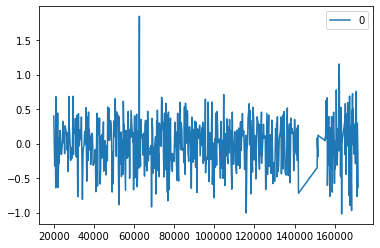

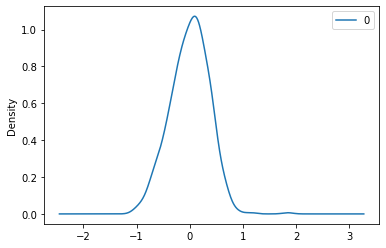

                0
count  615.000000
mean    -0.000188
std      0.364328
min     -1.019498
25%     -0.241555
50%      0.023928
75%      0.245829
max      1.844725


In [210]:
# fit an ARIMA model and plot residual errors

from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(new.TEMP, order=(18,1,0)) #lag 18 is ideal for +600 observations
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()
# density plot of residuals 
residuals.plot(kind='kde') 
plt.show()
# summary stats of residuals: if mean is close to zero then OK
print(residuals.describe())

## note: we fit the model on the entire dataset, ideally we perform this analysis on just the training
## dataset

<ipython-input-16-9256794e3399>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=36.507204, expected=36.500000
predicted=36.590140, expected=36.500000
predicted=36.394827, expected=36.500000
predicted=36.478077, expected=36.700000
predicted=36.584419, expected=36.600000
predicted=36.516376, expected=36.800000
predicted=36.603572, expected=36.700000
predicted=36.597324, expected=37.200000
predicted=36.730519, expected=37.300000
predicted=36.787828, expected=36.900000
predicted=36.912445, expected=37.400000
predicted=37.096488, expected=37.300000
predicted=37.031725, expected=37.500000
predicted=37.280511, expected=36.400000
predicted=37.173412, expected=36.300000
predicted=37.152284, expected=36.800000
predicted=36.942604, expected=37.100000
predicted=36.807754, expected=37.200000
predicted=36.874458, expected=37.200000
predicted=36.813813, expected=36.500000
predicted=36.849077, expected=37.000000
predicted=37.053671, expected=36.100000
predicted=36.801533, expected=37.000000
predicted=36.959737, expected=36.600000
predicted=36.629880, expected=36.800000


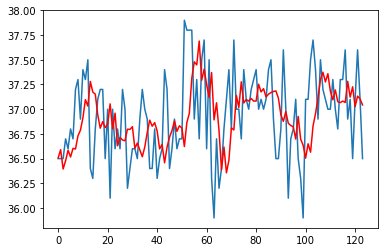

In [16]:
# evaluate an ARIMA model using a walk-forward validation

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = patient.TEMP.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # i use lag 5 here because it is nearly impossible to eval lag 18
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions)) 
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes 
plt.plot(test)
plt.plot(predictions, color='red') 
plt.show()